In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as  st
from scipy import stats as st1

In [210]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [211]:
#1.Загрузите файл HR.csv в pandas dataframe
df_hr = pd.read_csv('HR.csv')
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [212]:
df_hr.salary = df_hr.salary.astype('category')
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_montly_hours   14999 non-null  int64   
 4   time_spend_company     14999 non-null  int64   
 5   Work_accident          14999 non-null  int64   
 6   left                   14999 non-null  int64   
 7   promotion_last_5years  14999 non-null  int64   
 8   department             14999 non-null  object  
 9   salary                 14999 non-null  category
dtypes: category(1), float64(2), int64(6), object(1)
memory usage: 1.0+ MB


In [213]:
df_hr.salary.describe()

count     14999
unique        3
top         low
freq       7316
Name: salary, dtype: object

In [214]:
#2.Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).
df_hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [215]:
df_hr.mode(axis=0).head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low


<AxesSubplot:>

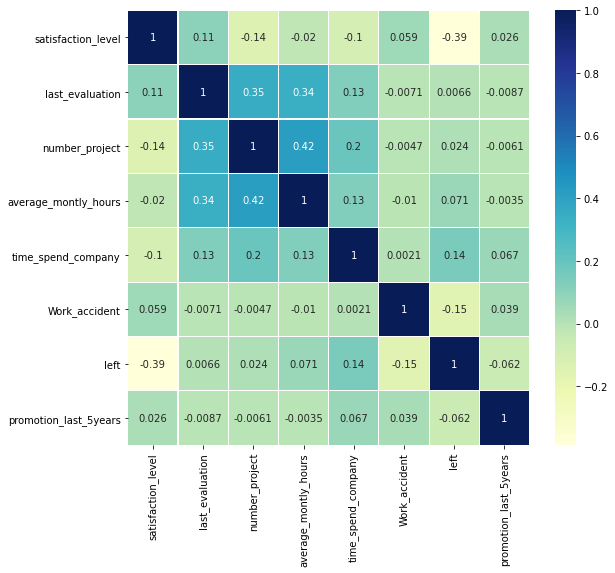

In [216]:
#3. Рассчитайте и визуализировать корреляционную матрицу дляколичественных переменных.
f, ax = plt.subplots(figsize =(9, 8))
correlation = df_hr.corr()
sns.heatmap(correlation, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True)

In [217]:
#Определите две самые скоррелированные и две наименее скоррелированные переменные.
df_hr.corr().abs().unstack().sort_values().drop_duplicates().head(2)

Work_accident         time_spend_company       0.002120
average_montly_hours  promotion_last_5years    0.003544
dtype: float64

In [218]:
df_hr.corr().abs().unstack().sort_values().drop_duplicates().tail(3)

left                satisfaction_level      0.388375
number_project      average_montly_hours    0.417211
satisfaction_level  satisfaction_level      1.000000
dtype: float64

In [219]:
grouped_by_departament = df_hr.groupby('department')

In [220]:
#4.Рассчитайте сколько сотрудников работает в каждомдепартаменте.
grouped_by_departament.size()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

In [221]:
#5.Показать распределение сотрудников по зарплатам.
df_hr['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

<AxesSubplot:>

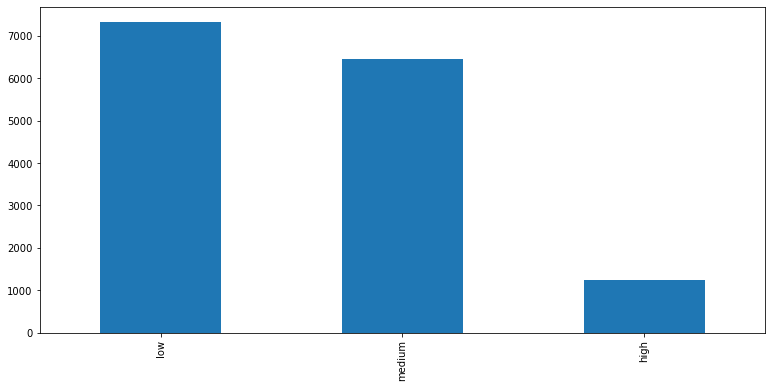

In [222]:
df_hr['salary'].value_counts().plot (kind='bar')

In [223]:
#6.Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
df_hr.groupby('department').salary.value_counts()

department   salary
IT           low        609
             medium     535
             high        83
RandD        medium     372
             low        364
             high        51
accounting   low        358
             medium     335
             high        74
hr           medium     359
             low        335
             high        45
management   high       225
             medium     225
             low        180
marketing    low        402
             medium     376
             high        80
product_mng  low        451
             medium     383
             high        68
sales        low       2099
             medium    1772
             high       269
support      low       1146
             medium     942
             high       141
technical    low       1372
             medium    1147
             high       201
Name: salary, dtype: int64

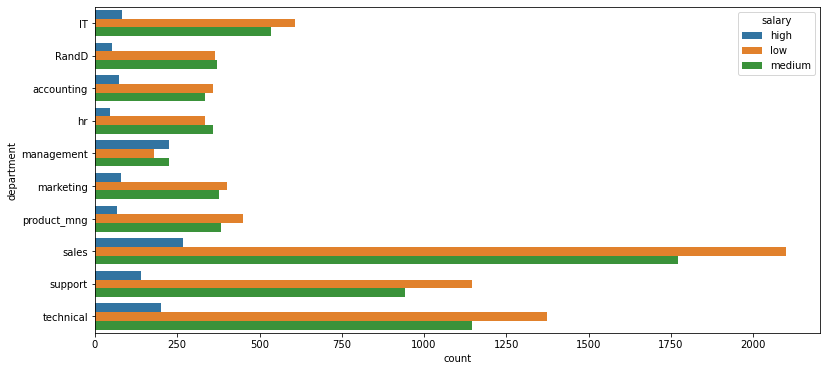

In [224]:
df1 = df_hr.groupby('department').salary.value_counts().reset_index(name='count')
sns.barplot(x="count", y="department", hue="salary", orient='h', data=df1);


In [225]:
#7.Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
'''
H0:  количество времени проводимое сотрудниками с высоким окладом > количество времени проводимое сотрудниками
с низким окладом

H1: количество времени проводимое сотрудниками с высоким окладом <=  количество времени проводимое сотрудниками
с низким окладом

За alpha здесь и далее будем принимать 0.05'''
alpha = 0.05
time_s1 = df_hr.loc[df_hr.salary=='high'].average_montly_hours
time_s2 = df_hr.loc[df_hr.salary=='low'].average_montly_hours
result = st1.ttest_ind(time_s1, time_s2, equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, количество времени проводимое сотрудниками с высоким окладом не больше  количество времени проводимое сотрудниками с низким окладом')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу


In [226]:
#8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
#Доля сотрудников с повышением за последние 5 лет.
# Доля среди уволившихся
(df_hr.loc[df_hr.left==1].promotion_last_5years.loc[df_hr.promotion_last_5years==1].count()/df_hr.loc[df_hr.left==1].promotion_last_5years.count())*100

0.5320638476617194

In [227]:
# Доля среди не уволившихся
(df_hr.loc[df_hr.left==0].promotion_last_5years.loc[df_hr.promotion_last_5years==1].count()/df_hr.loc[df_hr.left==0].promotion_last_5years.count())*100

2.6251312565628284

In [228]:
#Средняя степень удовлетворенности.
df_hr.groupby('left').satisfaction_level.mean()

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

In [229]:
#Среднее количество проектов.
df_hr.groupby('left').number_project.mean()

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

In [230]:
#9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился лисотрудник на основе 
#имеющихся факторов (кроме department и salary).Оценить качество модели на тестовой выборке.
data = df_hr.iloc[:,[0,1,2,3,4,5,7]]
left =  df_hr['left']
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 820.4 KB


In [232]:
left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [233]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, left, test_size=0.30,  random_state=42)

In [234]:
X_train.shape

(10499, 7)

In [235]:
y_train.shape

(10499,)

In [236]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [237]:
lda = LinearDiscriminantAnalysis()

In [238]:
# обучаем данные.Строим модель LDA
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [239]:
# делаем прогноз на тестовой выборке
a = lda.predict(X_test)
unique, counts = np.unique(a, return_counts=True)
print(unique , counts)

[0 1] [3947  553]


In [240]:
a.shape

(4500,)

In [241]:
y_test.shape

(4500,)

In [247]:
type(a)

numpy.ndarray

In [249]:
y_test = np.array(y_test)
type (y_test)

numpy.ndarray

In [250]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, a]).T
result.columns =['y_test','y_pred']

In [251]:
result

,y_test,y_pred
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
4495,0,0
4496,0,1
4497,0,0
4498,0,0


In [252]:
from sklearn.metrics import accuracy_score

In [253]:
accuracy_score(y_test, lda.predict(X_test))# рассчитываем точность прогноза, используя метрику accuracy

0.7557777777777778

In [254]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-4.57738626e+00,  6.13822647e-01, -2.10613368e-01,
         4.55442333e-03,  2.21314862e-01, -1.05033789e+00,
        -1.08559074e+00]])